In [1]:
from dataclasses import dataclass
import sklearn
from sklearn import metrics
from sklearn.metrics import average_precision_score, roc_auc_score
import imblearn
import pandas as pd
import numpy as np
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
@dataclass
class CheckMetric:
    
    def __init__(self, pos_size, neg_size, pos_loc=1, neg_loc=-1):
        self.pos_size = pos_size
        self.neg_size = neg_size
        self.pos_loc = pos_loc
        self.neg_loc = neg_loc
        self.pos = np.random.normal(loc=pos_loc,size=pos_size)
        self.neg = np.random.normal(loc=neg_loc,size=neg_size)
    
    @property
    def example_df(self):
        pos_df = pd.DataFrame({'x': self.pos, 'y': 1})
        neg_df = pd.DataFrame({'x': self.neg, 'y': 0})
        df = pd.concat([pos_df, neg_df])
        df = df.sample(frac=1, random_state=77).reset_index(drop=True)
        return df
    
    def example_plot(self):
        self.example_df[self.example_df['y']==0]['x'].plot(linestyle="",marker="o", alpha=0.5)
        self.example_df[self.example_df['y']==1]['x'].plot(linestyle="",marker="o", alpha=0.5)
        plt.show()
    
    def calc_metric(self, n=100):
        auclist = []
        prauc_list = []
        p_auc_005_list = []
        p_auc_02_list = []
        for i in range(100):
            self.pos = np.random.normal(loc=self.pos_loc, size=self.pos_size)
            self.neg = np.random.normal(loc=self.neg_loc, size=self.neg_size)
            pos_df = pd.DataFrame({'x': self.pos, 'y': 1})
            neg_df = pd.DataFrame({'x': self.neg, 'y': 0})
            df = pd.concat([pos_df, neg_df])
            df = df.sample(frac=1, random_state=77).reset_index(drop=True)
            auc = roc_auc_score(df['y'], df['x'])
            auclist.append(auc)
            prauc = average_precision_score(df['y'], df['x'])
            prauc_list.append(prauc)
            p_auc_005 = roc_auc_score(df['y'], df['x'], max_fpr=0.01)
            p_auc_005_list.append(p_auc_005)
            p_auc_02 = roc_auc_score(df['y'], df['x'], max_fpr=0.1)
            p_auc_02_list.append(p_auc_02)
        df = pd.DataFrame({'auc': auclist, 'prauc': prauc_list,'p_auc_0.01': p_auc_005_list,'p_auc_0.1': p_auc_02_list})
        return df
    
    def example_roc_plot(self):
        fig, ax = plt.subplots(1,2)
        fpr, tpr, thresholds = metrics.roc_curve(self.example_df['y'], self.example_df['x'])
        ax[0].plot(fpr, tpr)
        pre, rec, thresholds = metrics.precision_recall_curve(self.example_df['y'], self.example_df['x'])
        ax[1].set_xlim([0,1])
        ax[1].plot(pre, rec)

## 正負が１：１の場合

In [3]:
c = CheckMetric(pos_size=1000, neg_size=1000)

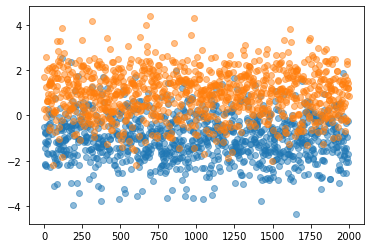

In [4]:
c.example_plot()

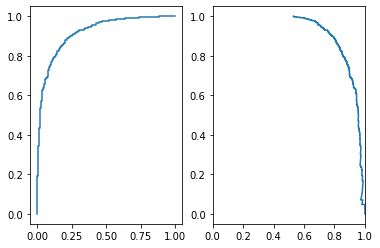

In [5]:
c.example_roc_plot()

In [6]:
c.calc_metric(100).describe()

,auc,prauc,p_auc_0.01,p_auc_0.1
count,100.000000,100.000000,100.000000,100.000000
mean,0.920973,0.921306,0.632980,0.786051
std,0.006108,0.006995,0.022440,0.014399
min,0.901560,0.900516,0.584472,0.747700
25%,0.917213,0.916990,0.617663,0.778717
50%,0.921280,0.922150,0.633794,0.787142
75%,0.925182,0.925543,0.645754,0.794911
max,0.936351,0.938567,0.691859,0.819421


## 正負が1：10の場合

In [7]:
c = CheckMetric(pos_size=100, neg_size=1000)

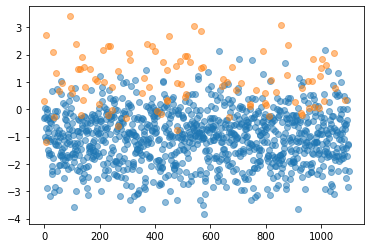

In [8]:
c.example_plot()

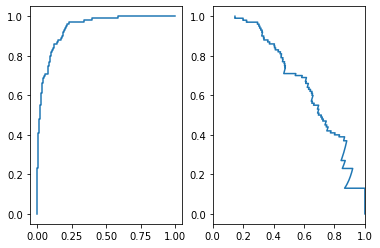

In [9]:
c.example_roc_plot()

In [10]:
c.calc_metric(100).describe()

,auc,prauc,p_auc_0.01,p_auc_0.1
count,100.000000,100.000000,100.000000,100.000000
mean,0.921602,0.651183,0.633764,0.787175
std,0.014326,0.045900,0.032382,0.023626
min,0.891230,0.508495,0.550251,0.727474
25%,0.910235,0.623184,0.611307,0.771579
50%,0.923485,0.648339,0.633668,0.786105
75%,0.930735,0.682238,0.657286,0.804658
max,0.956800,0.745378,0.708543,0.844000


## 正負が1:100の場合

In [11]:
c = CheckMetric(pos_size=10, neg_size=1000)

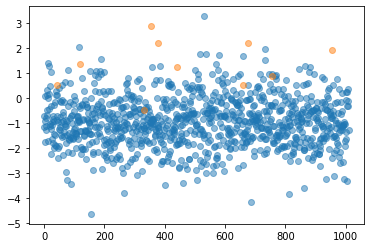

In [12]:
c.example_plot()

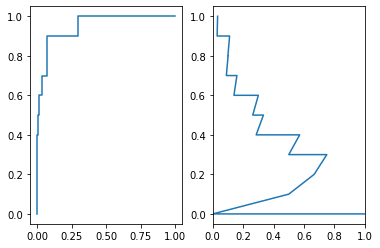

In [13]:
c.example_roc_plot()

In [14]:
c.calc_metric(100).describe()

,auc,prauc,p_auc_0.01,p_auc_0.1
count,100.000000,100.000000,100.000000,100.000000
mean,0.916780,0.303040,0.627889,0.782426
std,0.043104,0.119051,0.057444,0.065402
min,0.782600,0.076716,0.497487,0.611579
25%,0.893475,0.208299,0.586683,0.741842
50%,0.924400,0.294316,0.628141,0.784737
75%,0.949375,0.392594,0.668342,0.828026
max,0.987300,0.633730,0.773869,0.933158


## 正負が10:1の場合

In [15]:
c = CheckMetric(pos_size=1000, neg_size=100)

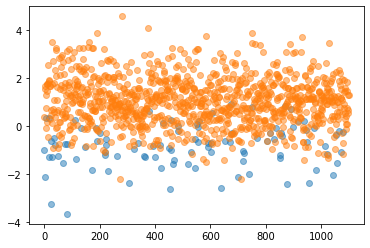

In [16]:
c.example_plot()

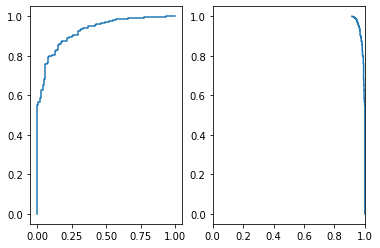

In [17]:
c.example_roc_plot()

In [18]:
c.calc_metric(100).describe()

,auc,prauc,p_auc_0.01,p_auc_0.1
count,100.000000,100.000000,100.000000,100.000000
mean,0.920259,0.990271,0.648739,0.783802
std,0.014507,0.002125,0.062871,0.040412
min,0.876670,0.984374,0.517085,0.698316
25%,0.910105,0.989044,0.604899,0.756579
50%,0.920585,0.990401,0.645477,0.787263
75%,0.930175,0.991838,0.696106,0.812237
max,0.961030,0.995869,0.820603,0.894421
